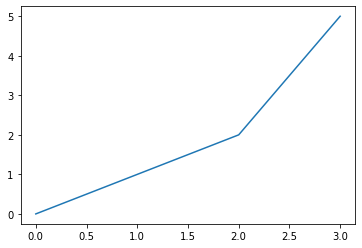

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot([0, 1, 2, 5])
plt.show()

In [2]:


#Set working directory. 
import os 

directory = os.getcwd()

print(directory)

C:\Users\mcuevas3


In [3]:
#import librarie.s 
import pandas as pd
import numpy as np
import warnings 

In [4]:
#silence warnings. 
warnings.filterwarnings('ignore')


In [5]:
#import apoptosis data. 
data = pd.read_csv("Transposed_Postive_Regulation_Apoptosis.csv")

In [6]:
x_frame = data.iloc[: , :-1]


y_frame = data.iloc[:,-1:]



In [7]:
#Import librabries. 
import pandas as pd
import numpy as np
import warnings 

from keras.layers import  Input,Dense,Conv2D,MaxPooling2D,UpSampling2D,Reshape, Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn import metrics
from scipy import interp
from tensorflow.keras.optimizers import SGD
from functools import partial
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential, Model
from keras import optimizers
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import f1_score,confusion_matrix
import shap
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from itertools import chain

In [8]:
#Encoding data. 
le = preprocessing.LabelEncoder()
oe = OrdinalEncoder()
he = OneHotEncoder()
x_frame = oe.fit_transform(x_frame)
y_frame =le.fit_transform(y_frame)
x_train, x_test, y_train, y_test = train_test_split(x_frame, y_frame)

print(x_train)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train.shape, y_train.shape)

[[159.   3.   1. ...  50. 110. 152.]
 [155.   7.   1. ... 121.  17.  28.]
 [ 20. 133.   1. ...  61. 153. 128.]
 ...
 [ 13. 141.   1. ...  96.  83.   6.]
 [145.  13.   1. ... 144.  57. 154.]
 [ 46. 110.   1. ... 115.  68.  44.]]
(122,)
(41, 306)
(41,)
(122, 306) (122,)


In [10]:
#Autoencoder function for optimization. 
def autoencoder(optimizer ='Adam',learn_rate=0.01, momentum=0):

    autoencoder = Sequential()
    autoencoder.add(Dense(306,  activation='relu', input_shape=(306, )))
    autoencoder.add(Dense(154,  activation='relu'))
    autoencoder.add(Dense(1,  activation='sigmoid'))
    autoencoder.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics=['accuracy'])
    return autoencoder


In [11]:
#Hyperparamater optimization. 
autoencoder = KerasClassifier(build_fn=autoencoder, verbose=0)

batch_size = [10, 100]
epochs = [10, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]

param_grid = dict(batch_size=batch_size, epochs=epochs,optimizer=optimizer,learn_rate=learn_rate)

grid = GridSearchCV(estimator=autoencoder, param_grid=param_grid, n_jobs=5, cv=3)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.811382 using {'batch_size': 100, 'epochs': 100, 'learn_rate': 0.01, 'optimizer': 'Adadelta'}
0.551016 (0.187080) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'SGD'}
0.673171 (0.098128) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'RMSprop'}
0.624187 (0.183522) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'Adagrad'}
0.738415 (0.068124) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'Adadelta'}
0.729878 (0.051033) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'Adam'}
0.729878 (0.085810) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'Adamax'}
0.680081 (0.036671) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'Nadam'}
0.672358 (0.101473) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.01, 'optimizer': 'SGD'}
0.703659 (0.110463) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.01, 'o

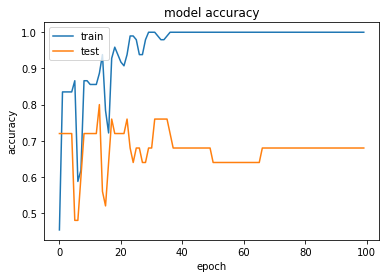

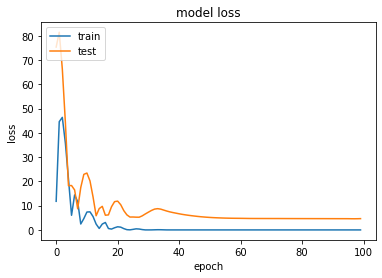

In [12]:
#Plot loss and accuracy. 
history = autoencoder.fit(x_train, y_train, epochs=100,batch_size=100, validation_split=0.2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
#Best autoencoder model. 
autoencoder = Sequential()
autoencoder.add(Dense(306,  activation='relu', input_shape=(306, )))
autoencoder.add(Dense(154,  activation='relu'))
autoencoder.add(Dense(1,  activation='sigmoid'))
autoencoder.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adadelta(learning_rate=0.01, name="Adadelta"), metrics=['accuracy'])
autoencoder.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 306)               93942     
                                                                 
 dense_7 (Dense)             (None, 154)               47278     
                                                                 
 dense_8 (Dense)             (None, 1)                 155       
                                                                 
Total params: 141,375
Trainable params: 141,375
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Fit best model to apoptosis data. 
autoencoder.fit(x_train,y_train, batch_size= 100, epochs= 100)


Epoch 1/100
2/2 [==============================] - 0s 16ms/step - loss: 14.1493 - accuracy: 0.7951
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 12.9846 - accuracy: 0.8033
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 12.0143 - accuracy: 0.8115
Epoch 4/100
2/2 [==============================] - 0s 22ms/step - loss: 11.0373 - accuracy: 0.7951
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.2077 - accuracy: 0.7869
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3193 - accuracy: 0.7623
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 8.9849 - accuracy: 0.7295
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 8.7239 - accuracy: 0.7295
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 8.4180 - accuracy: 0.6885
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 8.2493 - accuracy: 0.7459
Epoch 11/100
2/2 [=

2/2 [==============================] - 0s 9ms/step - loss: 2.0017 - accuracy: 0.9180
Epoch 85/100
2/2 [==============================] - 0s 6ms/step - loss: 1.9643 - accuracy: 0.9344
Epoch 86/100
2/2 [==============================] - 0s 5ms/step - loss: 1.9257 - accuracy: 0.9016
Epoch 87/100
2/2 [==============================] - 0s 9ms/step - loss: 1.8924 - accuracy: 0.8689
Epoch 88/100
2/2 [==============================] - 0s 6ms/step - loss: 1.9464 - accuracy: 0.9262
Epoch 89/100
2/2 [==============================] - 0s 7ms/step - loss: 1.8956 - accuracy: 0.9262
Epoch 90/100
2/2 [==============================] - 0s 7ms/step - loss: 1.8095 - accuracy: 0.8770
Epoch 91/100
2/2 [==============================] - 0s 6ms/step - loss: 1.7738 - accuracy: 0.9098
Epoch 92/100
2/2 [==============================] - 0s 7ms/step - loss: 1.7567 - accuracy: 0.9180
Epoch 93/100
2/2 [==============================] - 0s 6ms/step - loss: 1.7282 - accuracy: 0.9180
Epoch 94/100
2/2 [===============

[1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.8529411764705882
[1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1]
<class 'numpy.ndarray'>


[]

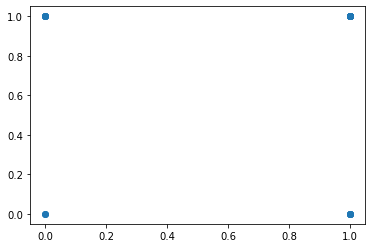

In [15]:
#Make prections using apoptosis data and model. 
predictions = autoencoder.predict(x_test)
test_predictions = []
for l in predictions: 
    for item in l:
        test_predictions.append(item)
test_predictions = np.array(test_predictions)
test_predictions = np.round(test_predictions)

print(test_predictions)
f1score=f1_score(test_predictions,y_test)

print(f1score)
print(y_test)
print(type(y_test))

plt.scatter(y_test, test_predictions)
plt.plot()

In [16]:
#Confusion matrix of apoptosis data. 
confusion_matrix(y_test, test_predictions)

array([[ 2,  5],
       [ 5, 29]], dtype=int64)